# 3D Matrix

Max Sum of 3D Submatrix: 45


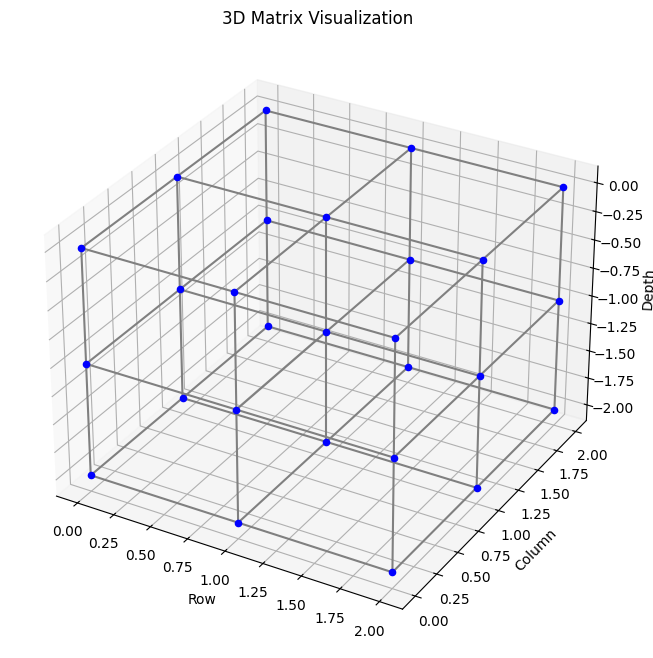

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def max_sum_submatrix_3d(matrix):
    D, R, C = len(matrix), len(matrix[0]), len(matrix[0][0])
    max_sum = float('-inf')
    
    for d1 in range(D):
        for d2 in range(d1, D):
            temp2D = np.zeros((R, C), dtype=int)
            
            for d in range(d1, d2 + 1):
                temp2D += np.array(matrix[d])
            
            max_sum = max(max_sum, max_sum_submatrix_2d(temp2D))
    
    return max_sum

def max_sum_submatrix_2d(matrix):
    R, C = len(matrix), len(matrix[0])
    max_sum = float('-inf')
    
    for left in range(C):
        row_sum = [0] * R
        
        for right in range(left, C):
            for i in range(R):
                row_sum[i] += matrix[i][right]
            
            max_sum = max(max_sum, kadane(row_sum))
    
    return max_sum

def kadane(arr):
    max_sum = float('-inf')
    current_sum = 0
    
    for num in arr:
        current_sum = max(num, current_sum + num)
        max_sum = max(max_sum, current_sum)
    
    return max_sum

def visualize_graph(matrix):
    """Visualizes the 3D matrix as a graph using Matplotlib."""
    D, R, C = len(matrix), len(matrix[0]), len(matrix[0][0])
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    for d in range(D):
        for r in range(R):
            for c in range(C):
                ax.scatter(r, c, -d, color='blue')
                if c + 1 < C:
                    ax.plot([r, r], [c, c + 1], [-d, -d], color='gray')
                if r + 1 < R:
                    ax.plot([r, r + 1], [c, c], [-d, -d], color='gray')
                if d + 1 < D:
                    ax.plot([r, r], [c, c], [-d, -(d + 1)], color='gray')
    
    ax.set_xlabel('Row')
    ax.set_ylabel('Column')
    ax.set_zlabel('Depth')
    ax.set_title('3D Matrix Visualization')
    plt.show()

# Example Usage
matrix_3d = [
    [[1, -2, 3], [-4, 5, -6], [7, -8, 9]],
    [[-1, 2, -3], [4, -5, 6], [-7, 8, -9]],
    [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
]

print("Max Sum of 3D Submatrix:", max_sum_submatrix_3d(matrix_3d))
visualize_graph(matrix_3d)
